## Introduction to Machine Learning: Homework 1
    
    
__Given date:__ Tuesday October 6

__Due date:__ Tuesday October 20

__Total:__ 25pts + 4pts
    
In this first homework we review gradient descent, linear regression and classification. The total is on 20pts with a 5pts bonus so that you can score 25/20 if you get the maximum in every exercise. 

### Question 1. Gradient descent on the Ridge loss (5pts)

Consider the data shown below. In this first exercise we want to learn the quadratic function that best fits this data. 

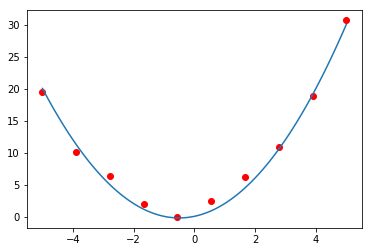

In [17]:
import numpy as np
import matplotlib.pyplot as plt



xtraining = np.linspace(-5,5,10)
xtest = np.linspace(-5,5,100)

t = 0.1 + xtraining + xtraining**2
ttest = 0.1 + xtest + xtest**2

ttraining = t+ np.random.normal(0,1,np.shape(xtraining))

plt.scatter(xtraining, ttraining, c='r')
plt.plot(xtest, ttest)
plt.show()

#### Question 1.1. 

Start by completing the function 'ridgeLoss' that computes the Ridge loss for a given weight vector $\boldsymbol{\beta}$ and regularization parameter $\lambda$. 

In [ ]:

# Step 1: Define the ridge loss

def ridgeLoss(beta, lam, x, t):
    
    '''The function should return the ridge regularized RSS loss,
    sum_{i=1}^N |t^i - (beta_0 + sum_j beta_j^T x^i_j)|^2 + lambda sum_j |beta_j|^2
    for a set of pairs {x_i, t_i} weight vector beta and regularization parameter lambda '''
    
    loss = # complete with your code 
    
    
    return loss

# Step 2: implement the gradient descent iterations

def gradient_descent(beta0, eta, fun, maxIter):
    
    '''general gradient descent iterations. The function gradient_descent should 
    return the minimum of the function fun starting from beta0 and with learning rate eta. 
    The gradient iterations should stop after maxIter iterations'''
    
    
    
    return beta_final


# Step 3. Apply your functions to solve the regression problem above 


    
    
    

### Question 2. Gradient descent with momemtum (5pts)

#### Question 2.1. Gradient oscillations (2pts)

When using gradient descent, one of the issue that might arise is to have oscillating iterates, the first step being taken in one direction, the second one, in the opposite direction. Consequently, step sizes that are too big are at risk of preventing efficient convergence of the iterates to the minimum. To see this, apply you gradient descent iterations to the function below, starting at $x_1=-4$,
$x_2=-6$ and taking a learning rate $\eta = 0.4$. Play a little with the learning rate. What do you observe? Comment your results. 

Recall that the gradient iterations are given as 

$$\mathbf{x}^{k+1} \leftarrow  \mathbf{x}^{k} - \eta \nabla f(\mathbf{x}^k)$$

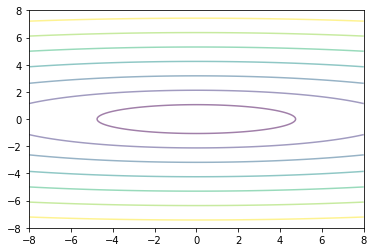

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-8, 8, 800)
y = np.linspace(-8, 8, 800)
xx, yy = np.meshgrid(x, y)
ff = np.sqrt(0.1*xx**2 + 2*yy**2)
plt.contour(xx,yy,ff,alpha = 0.5)
plt.show()

#### Question 2.2. Momentum (3pts)


To mitigate those oscillations (among other advantages) and accelerate convergence, one can combine the gradient iterations with an additional momentum term, getting the system

$$\left\{\begin{array}{l}
\mathbf{v}^{k+1} \leftarrow \gamma\mathbf{v}^k + \nabla f(\mathbf{x}^{k})\\
\mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta\cdot \mathbf{v}\end{array}\right.$$

Take $\gamma=0.5$, $\eta = 0.4$ and plot the iterations you get with the momentum approach on top of the level lines.   

In [ ]:
def MoMgradientDescent(x0,maxIter, gamma, eta):
    
    '''Implement the gradient descent with momentum for the parameters gamma and eta. 
    You can take the initial speed v=0.'''
    
    
    
    
    return solution 

#### Question 2.3. 

Try various values of the $\gamma$ (momentum parameter) including $\gamma=0$. what do you notice? comment your results below.


### Question 3. Logistic regression and Fischer scoring.  (10pts)

#### Question 3.1 Logistic regression

As we saw during the lectures, one approach at learning a (binary) linear discriminant is to combine the sigmoid activation function with the linear discriminant $\beta_0 + \mathbf{\beta}^T \mathbf{x}$. We then assume that the probability of having a particular target ($0$ vs $1$) follows a Bernoulli with parameter $\sigma(\tilde{\mathbf{\beta}}^T\tilde{\mathbf{x}})$. i.e. we have 

$$\left\{\begin{array}{l}
P(t = 1|x) = \sigma(\mathbf{\beta}^T\mathbf{x})\\
P(t = 0|x) = 1-\sigma(\mathbf{\beta}^T\mathbf{x})\end{array}\right.$$

The total density can read from the product of each of the independent densities as 

$$P(\left\{t_i\right\}_{i=1}^N) = \prod_{i=1}^N \sigma(\mathbf{\beta}^T\mathbf{x})^{t^{(i)}}(1-\sigma(\mathbf{\beta}^T\mathbf{x}))^{1-t^{(i)}}$$

we can then take the log and compute the derivatives of the resulting expression with respect to each weight $\beta_j$. Implement this approach below. Recall that the derivative of sigma has a _simple expression_. The first function below might not be needed in the implementation of the function 'solve_logisticRegression'

In [ ]:
# Step 1 define the sigmoid activation and its derivative


def sigmoid(x):

    '''the function should return the sigmoid and its derivative at all the 
    points encoded in the vector x (be careful of the fact that )'''
    
    
    return sig, deriv_sig


def solve_logisticRegression(xi, ti, beta0, maxIter, eta):
    
    '''The function should return the vector of weights in logistic regression
    following from gradient descent iterations applied to the log likelihood function'''
    
    
    
    return beta



#### Question 3.2 Logistic regression and Fisher scoring. 

An interesting aspect of the MLE estimator in logistic regression (as opposed to other objective functions) is that the Hessian is positive definite. We can thus improve the iterations by using a second order method (such as Newton's method) where the simpler gradient iterations $\mathbf{\beta}^{k+1}\leftarrow \mathbf{\beta}^k - \eta\nabla \ell(\mathbf{\beta}^k)$ are replaced by 

$$\mathbf{\beta}^{k+1}\leftarrow \mathbf{\beta}^k - \eta H^{-1}(\mathbf{\beta^k})\nabla \ell(\mathbf{\beta}^k)$$

Start by completing the function below which should return the Hessian of the negative log likelihood. Note that we move in the direction $-\nabla_{\beta}\ell$, hence we minimize. You should there consider the negative log likelihood.  

In [ ]:
def HessianMLE(beta):
    
    '''Function should return the Hessian (see https://en.wikipedia.org/wiki/Hessian_matrix) 
    of the log likelihood at a particular value of the weights beta'''
    
    
    return HessianMatrix
    

In [ ]:
def Fisher_scoring(beta0, maxIter, eta):
    
    '''Function should compute the logistic regression classifier by relying on Fisher scoring
    iterates should start at beta0 and be applied with a learning eta'''

    while numIter<maxIter:
    
        hessian_beta = HessianMLE(beta)
        
        # if no eigenvalue is 0
        
            invHessian = # complete 
        
        # else 
        
            print('Error')
        
        betaNext = betaPrevious + eta*np.matmul(invHessian,gradient)
    


    return optimal_beta

#### Question 3.3 Comparing the two approaches.

Compare the gradient descent iterates with the Fisher scoring iterates for the dataset given below. Plot the evolution of the log likelihood through the iterations, for both methods.  

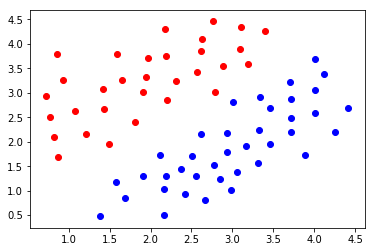

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.io
class1 = scipy.io.loadmat('class1HW1_LR.mat')['class1']
class0 = scipy.io.loadmat('class2HW1_LR.mat')['class2']

targets_class1 = np.ones(np.shape(class1)[0])
targets_class0 = np.zeros(np.shape(class0)[0])

plt.scatter(class1[:,0], class1[:,1], c = 'r')
plt.scatter(class2[:,0], class2[:,1], c = 'b')
plt.show()



In [ ]:

'''Your plots. replace the vectors NlogLikelihood_gradient and NlogLikelihood_Fisher 
with the values of the negative log likelihood at each iteration obtained from your functions above'''


plt.figure()
plt.subplot(211)
plt.plot()
plt.title()

fig, axs = plt.subplots(2, 1, constrained_layout=True)

# gradient descent plot

axs[0].plot(iterations, NlogLikelihood_gradient)
axs[0].set_title('gradient descent')

# Fisher scoring plot

axs[1].plot(iterations, NlogLikelihood_Fisher)
axs[1].set_ylabel('Fisher scoring')

plt.show()

### Question 4. kernel and real data (5pts)

We want to learn a classifier to discriminate between the images of the 1 and the 8 digits (see below). Images are size $28\times 28$ and we thus don't want to use a classifier on the images themselves. Extend your gradient descent algorithm from Question 1 so that the iterations rely on the Kernel instead of the features. Then use the Gaussian kernel to encode similarity between the images $\text{im}_i$ and $\text{im}_j$ as $\exp(-\frac{\|\text{im}_i - \text{im}_j\|}{2\sigma^2})$ for an appropriate sigma. 



In [7]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


(array([    3,     6,     8, ..., 69978, 69984, 69994]),)
(array([   17,    31,    41, ..., 69959, 69967, 69991]),)
(70000, 784)


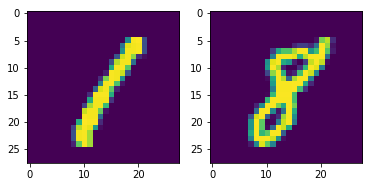

In [24]:
print(np.where(y=='1'))
print(np.where(y=='8'))

# extracting the images corresponding to 1 and 8

print(np.shape(X))
images1 = np.squeeze(X[np.where(y=='1'),:])
images8 = np.squeeze(X[np.where(y=='8'),:])

import matplotlib.pyplot as plt
import numpy as np

plt.subplot(121)
plt.imshow(np.reshape(images1[0],(28,28)))

plt.subplot(122)
plt.imshow(np.reshape(images8[0],(28,28)))
plt.show()




### Bonus 1. (4pts)

In Question 1 above, you got to implement gradient descent on the ridge regression loss. As we saw, an alternative to this loss is the LASSO where one minimizes the usual RSS criterion augnmented with a penalty on the absolute of the weights, i.e.

$$\min_{\boldsymbol{\beta}, \beta_0} \sum_{i=1}^N |t^{(i)} - (\boldsymbol{\beta}^T\boldsymbol{x}^{(i)} + \beta_0)|^2 + \lambda \sum_{j=0}^D |\beta_j|$$



(the difficulty is that the absolute value is not differentiable at $0$. There exists several approaches at handling this difficulty). Extend your answer to question 1 and make your function capable of handling both the Ridge and LASSO formulation by adding an extra parameter. 

In [ ]:
def linearRegression_regularized(x_i, t_i, beta_0,eta, type):
    
    '''The function should return the solution of the linear regression 
    problem obtained through gradient descent on either the unregularized (type ='None') formulation, 
    the Ridge (type = 'ridge') or the Lasso (type ='lasso') regularization'''
    
    
    return 
    
